In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 2: Load the dataset
file_path = "C:/Users/kesav/Downloads/customer_segmentation_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


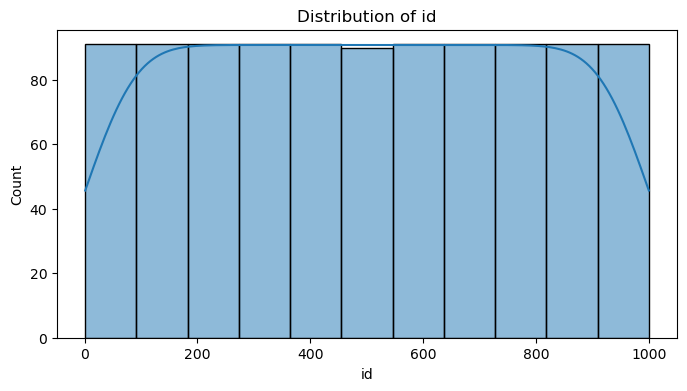

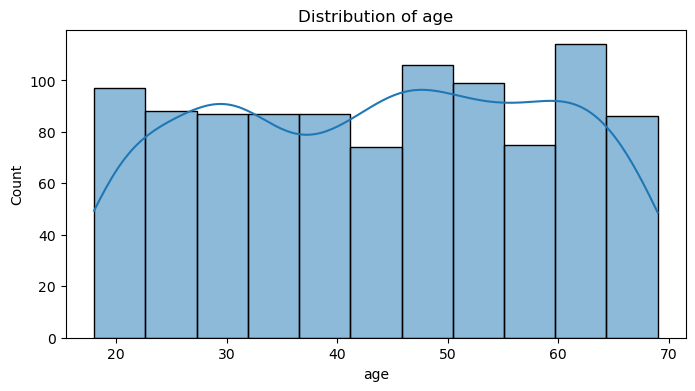

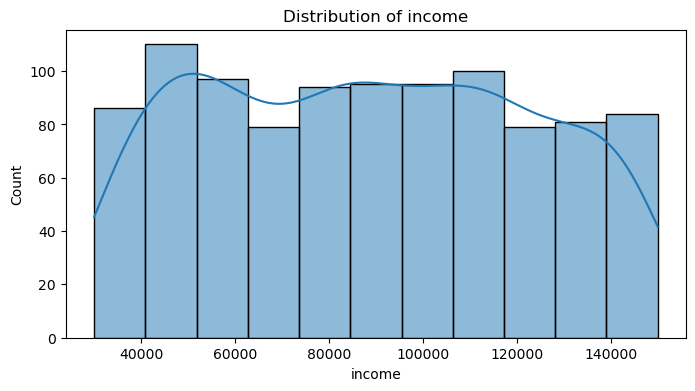

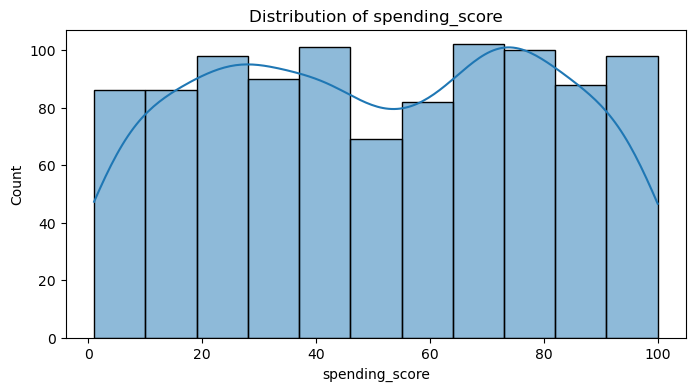

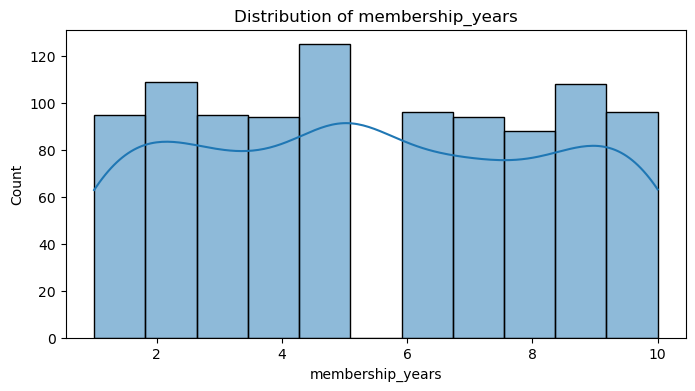

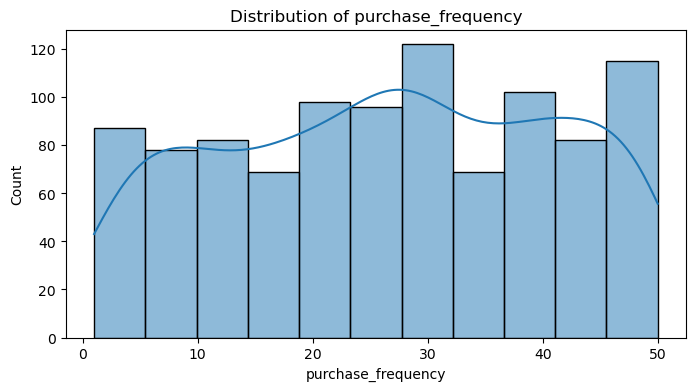

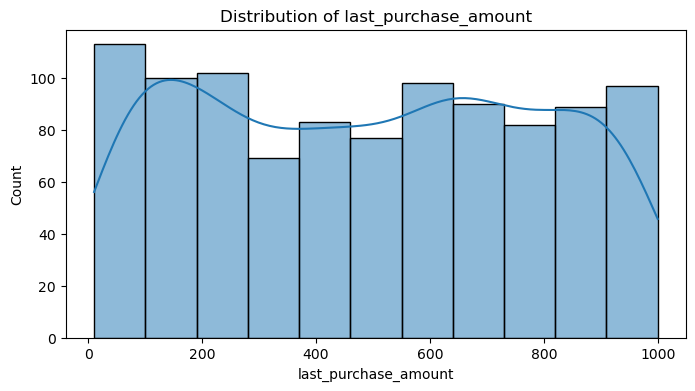

In [5]:
# Cell 3: General information about the dataset
data.info()

# Cell 4: Summary statistics
data.describe()

# Cell 5: Check for missing values
data.isnull().sum()

# Cell 6: Data visualization (e.g., distribution of numerical features)
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()




In [7]:
# Cell 8: Handle missing values (if any)
data = data.fillna(method='ffill')  # Example strategy: forward fill

# Cell 9: Encode categorical variables (if any)
from sklearn.preprocessing import LabelEncoder
for column in data.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

# Cell 10: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()


C:\Users\kesav\AppData\Local\Temp\ipykernel_27332\2448463985.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Example strategy: forward fill


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,-1.730320,-0.384644,-1.260917,0.316868,1.358468,-0.865010,-0.182348,-0.051028,-1.281540
1,-1.726856,-1.515362,-1.260917,-0.282016,0.321865,-1.215358,1.082005,1.386386,-1.523763
2,-1.723391,1.078639,-1.260917,1.112778,-0.714738,-1.215358,0.098620,-1.488442,-0.230005
3,-1.719927,-0.251618,1.233479,-1.210096,0.805613,1.237080,-1.516943,0.667679,1.690080
4,-1.716463,1.411203,-1.260917,1.523374,-1.025718,-0.865010,-0.112106,-0.769735,-0.491443


C:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

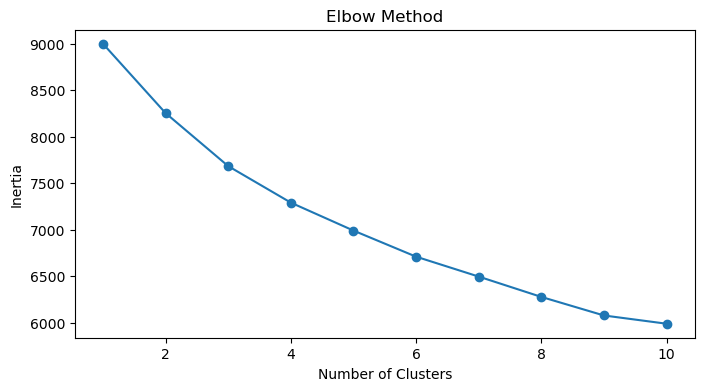

C:\Users\kesav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Cluster
0,1,38,0,99342,90,3,24,2,113.53,3
1,2,21,0,78852,60,2,42,4,41.93,3
2,3,60,0,126573,30,2,28,0,424.36,3
3,4,40,2,47099,74,9,5,3,991.93,2
4,5,65,0,140621,21,3,25,1,347.08,3


In [9]:
# Cell 11: Optimal number of clusters using the Elbow method
from sklearn.cluster import KMeans
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Cell 12: Apply K-Means clustering
optimal_k = 4  # Example value (determine from the elbow plot)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = clusters
scaled_data['Cluster'] = clusters
data.head()


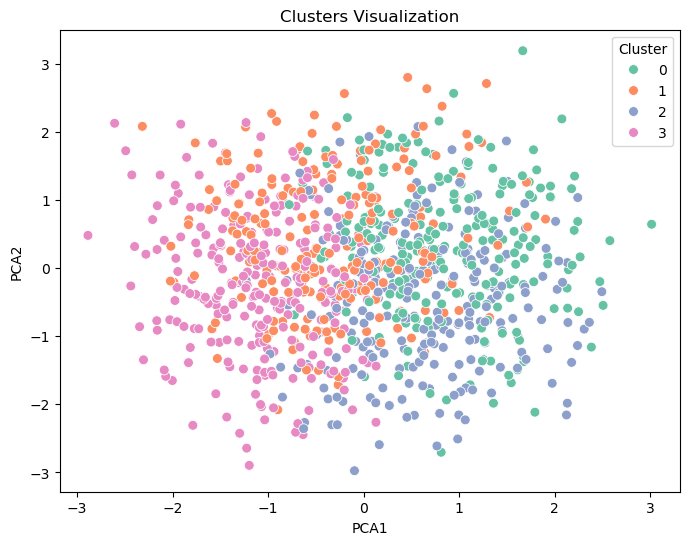

In [11]:
# Cell 13: Visualize clusters (2D projection using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data.drop('Cluster', axis=1))
scaled_data['PCA1'] = pca_result[:, 0]
scaled_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=scaled_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=50)
plt.title('Clusters Visualization')
plt.show()
